# Main Concepts

- linear model: $f(w,b) = w^Tx + b$
- activation function: e.g. unit step function
- approximation: $\hat{y} = f(w^Tx+b)$
    - perceptron update rule: $w = w + \delta _w$, $\delta _w = \alpha(y_i-\hat{y_i})x_i$ (iterate for each $x_i$)
    - weights are pusehd towards positive or negative target class in case of missclassification

In [1]:
import numpy as np

class Perceptron:

    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.activation_function = self._unit_step_func
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        # ensure y is a binary class
        y_ = [1 if i > 0 else 0 for i in y]

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted
    
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Test

- only works with linearly separable groups

Accuracy: 100.00%


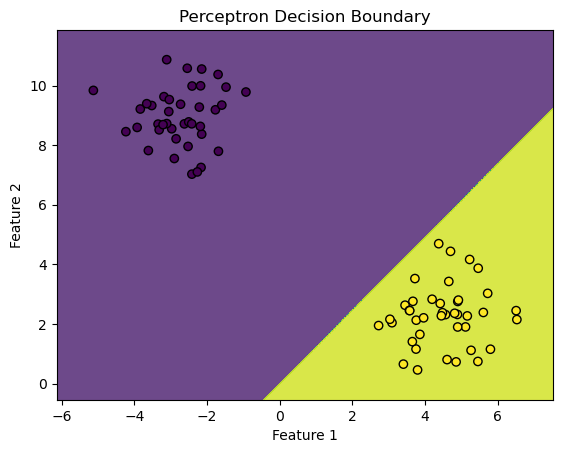

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Perceptron(lr=0.1, n_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy(y_test, y_pred) * 100:.2f}%")

# Plotting the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
plot_decision_boundary(X_train, y_train, model)